In [1]:
import numpy as np
import pandas as pd


import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
# sns.set_style("whitegrid")
plt.style.use('ggplot')

/usr/local/lib/python2.7/dist-packages/pandas/core/computation/__init__.py:18: UserWarning: The installed version of numexpr 2.4.3 is not supported in pandas and will be not be used
The minimum supported version is 2.4.6

  ver=ver, min_ver=_MIN_NUMEXPR_VERSION), UserWarning)


In [2]:
df = pd.read_excel('data/kpmg_data.xlsx', sheetname=1)
df_cluster = pd.read_csv('df_data.csv')

In [3]:
df['Cluster'] = df_cluster['category_cluster']

In [4]:
def cluster_name(cluster):
    if cluster == 0:
        return 'A'
    elif cluster == 1:
        return 'B'
    elif cluster ==2:
        return 'C'
    elif cluster == 3:
        return 'D'
    elif cluster ==4:
        return 'E'
df['Cluster'] = df['Cluster'].apply(cluster_name)

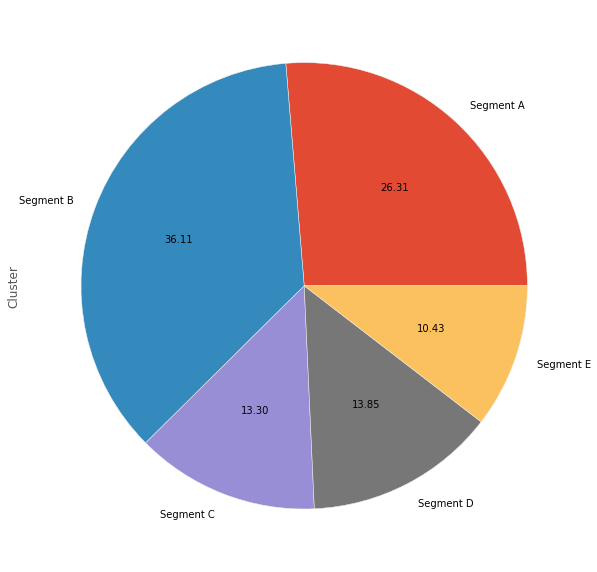

In [47]:
category_cluster = df['Cluster'].value_counts().sort_index()
# plt.title('Customer segments as a proportion of total customer base')
category_cluster.plot.pie(labels=['Segment A', 'Segment B', 'Segment C', 'Segment D', 'Segment E']
                          ,figsize=(10, 10),autopct='%.2f')

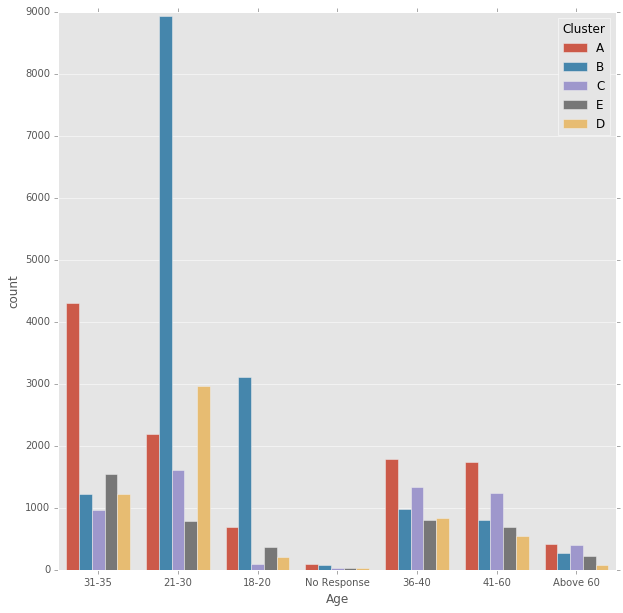

In [47]:
plt.rcParams['figure.figsize']=(10,10)
sns.countplot(x='Age', data=df, hue='Cluster')

In [52]:
pd.crosstab(index=df['Cluster'], columns=df['Age'], normalize='index')

Age,18-20,21-30,31-35,36-40,41-60,Above 60,No Response
Cluster,,,,,,,
A,0.061565,0.195474,0.383820,0.158945,0.154223,0.037598,0.008375
B,0.202065,0.580287,0.079410,0.063373,0.051750,0.017986,0.005130
C,0.016220,0.282969,0.171368,0.235719,0.218089,0.070698,0.004937
D,0.036234,0.503217,0.207078,0.142398,0.093126,0.011852,0.006095
E,0.081367,0.178692,0.348618,0.178917,0.156215,0.051247,0.004945


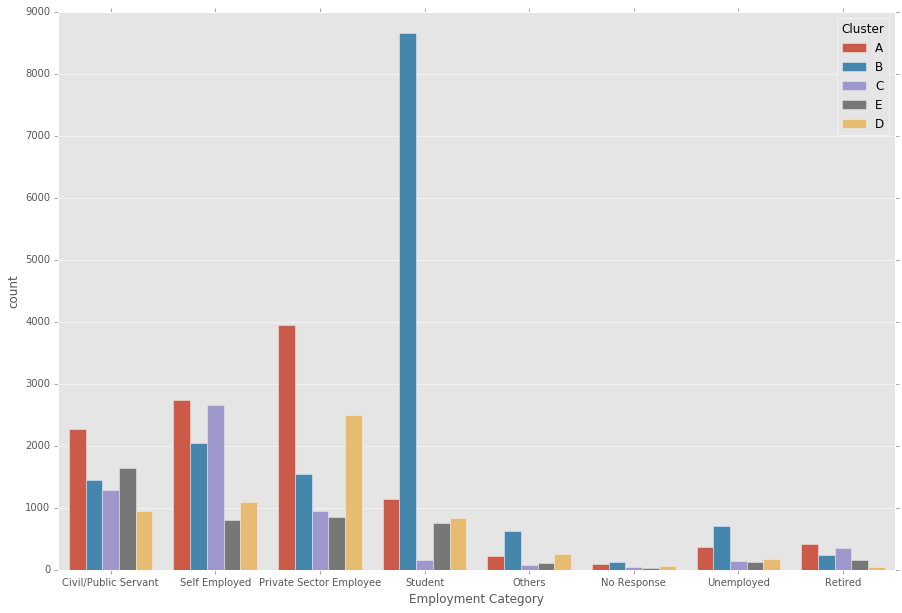

In [60]:
plt.rcParams['figure.figsize']=(15,10)
sns.countplot(x='Employment Category', data=df, hue='Cluster')
# help(sns.countplot)

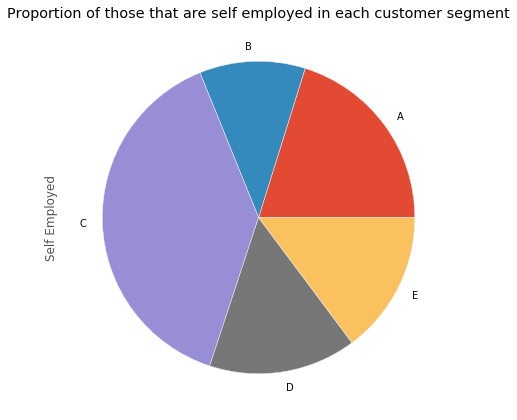

In [29]:
pd.crosstab(index=df['Cluster'], columns=df['Employment Category'], normalize='index')['Self Employed'].plot.pie(figsize=(7, 7))
plt.title('Proportion of those that are self employed in each customer segment')

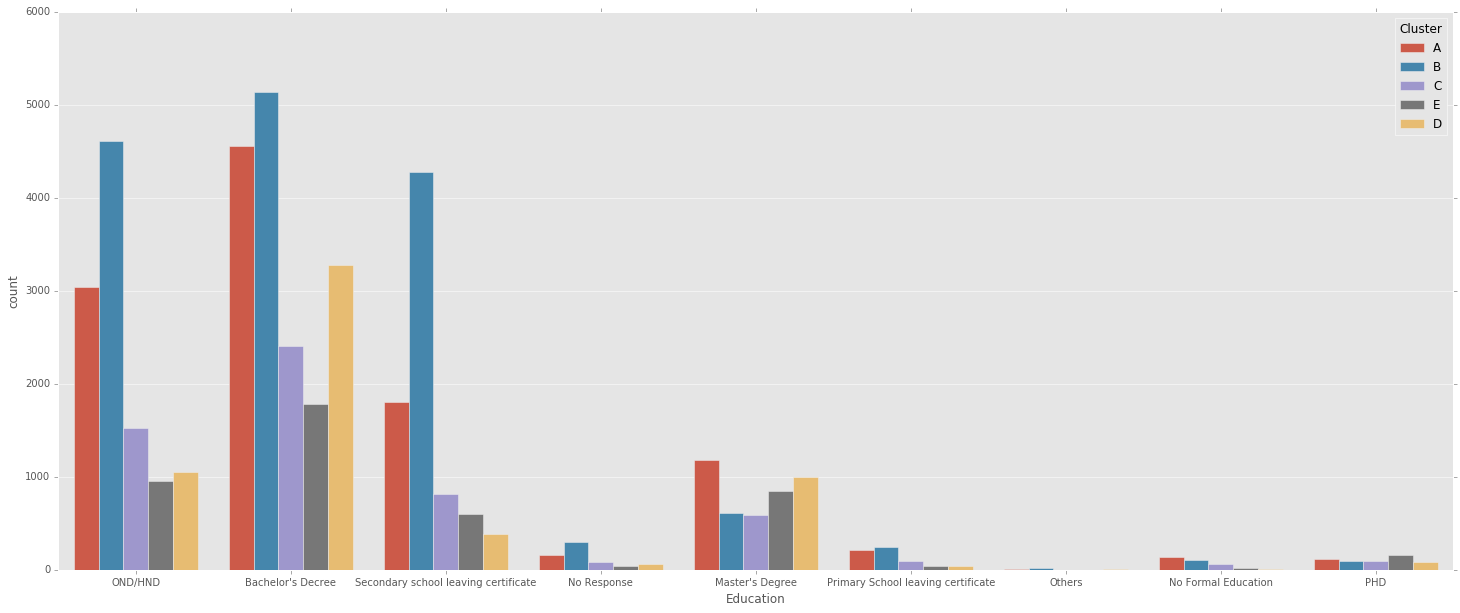

In [69]:
plt.rcParams['figure.figsize']=(25,10)
sns.countplot(x='Education', data=df, hue='Cluster')

In [53]:
pd.crosstab(index=df['Cluster'], columns=df['Education'], normalize='columns')

Education,Bachelor's Decree,Master's Degree,No Formal Education,No Response,OND/HND,Others,PHD,Primary School leaving certificate,Secondary school leaving certificate
Cluster,,,,,,,,,
A,0.265571,0.279537,0.419753,0.251163,0.272280,0.205128,0.203297,0.339623,0.228934
B,0.299481,0.144612,0.311728,0.457364,0.412532,0.615385,0.170330,0.380503,0.543020
C,0.140069,0.140359,0.203704,0.128682,0.136319,0.025641,0.168498,0.149371,0.103046
D,0.191051,0.234641,0.015432,0.094574,0.093948,0.102564,0.157509,0.061321,0.049239
E,0.103828,0.200851,0.049383,0.068217,0.084920,0.051282,0.300366,0.069182,0.075761


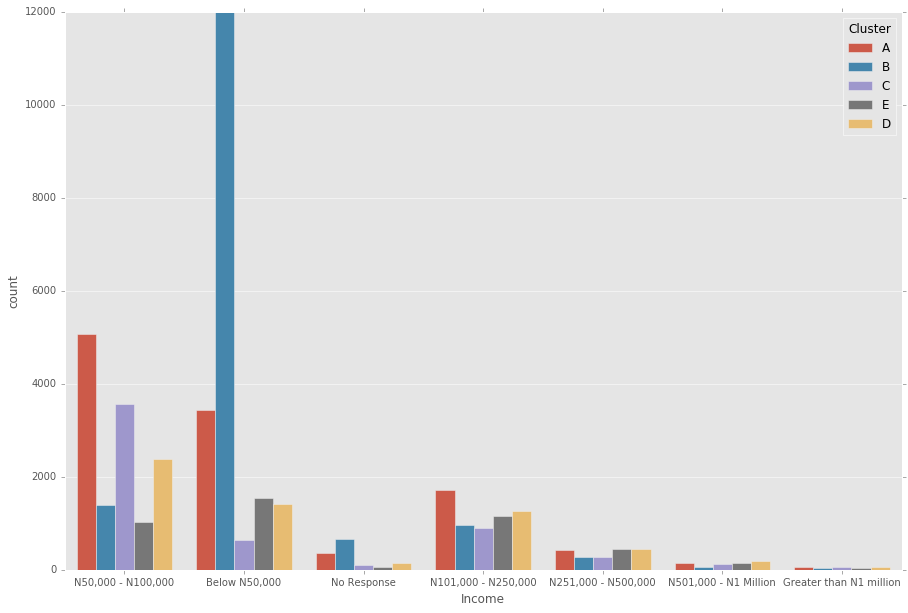

In [74]:
plt.rcParams['figure.figsize']=(15,10)
sns.countplot(x='Income', data=df, hue='Cluster')

In [75]:
pd.crosstab(index=df['Cluster'], columns=df['Income'], normalize='index')

Income,"Below N50,000",Greater than N1 million,"N101,000 - N250,000","N251,000 - N500,000","N50,000 - N100,000","N501,000 - N1 Million",No Response
Cluster,,,,,,,
A,0.305506,0.004900,0.153332,0.037865,0.452156,0.013721,0.032520
B,0.778846,0.002922,0.062074,0.018375,0.089864,0.004285,0.043634
C,0.113540,0.011107,0.158674,0.048131,0.627645,0.023625,0.017278
D,0.241280,0.010498,0.212496,0.075686,0.401964,0.031832,0.026244
E,0.348168,0.010115,0.261407,0.101821,0.229715,0.034839,0.013936


In [6]:
def device_encode(col):
    if col['Device1'] == 'Yes':
        return 'desktop'
    elif col['Device2'] == 'Yes':
        return 'laptop'
    elif col['Device3'] == 'Yes':
        return 'tablet'
    elif col['Device4'] =='Yes':
        return 'smartphone'

df['device_used'] = df.apply(device_encode, axis=1)

col_devices = ['Device1', 'Device2', 'Device3', 'Device4']

df.drop(col_devices, axis=1, inplace=True)

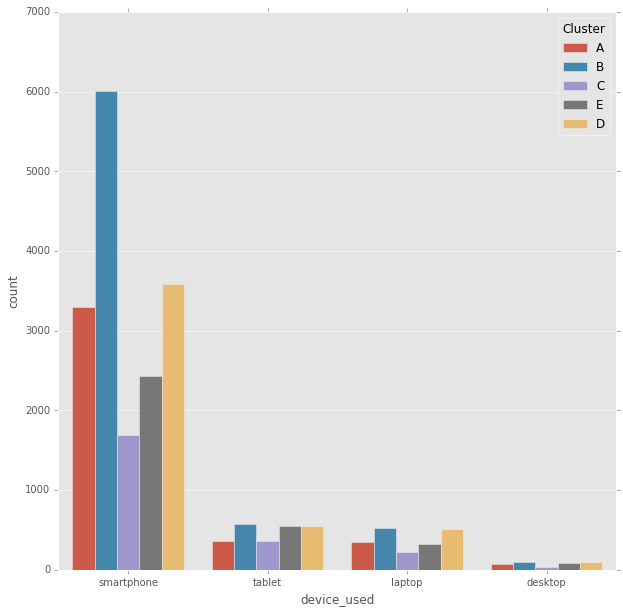

In [8]:
plt.rcParams['figure.figsize']=(10,10)
sns.countplot(x='device_used', data=df, hue='Cluster')

In [9]:
pd.crosstab(index=df['Cluster'], columns=df['device_used'], normalize='index')

device_used,desktop,laptop,smartphone,tablet
Cluster,,,,
A,0.018124,0.085231,0.808964,0.087681
B,0.014284,0.073499,0.832201,0.080017
C,0.017346,0.097138,0.731136,0.154380
D,0.021693,0.108256,0.755265,0.114785
E,0.026246,0.095842,0.717487,0.160425


In [19]:
chan_freq = ['FreqBra','FreqATM','FreqPOS','FreqInt','FreqMob','FreqUSSD','FreqTel']

def frequency_encode(col):
    if col == 'Rarely':
        return 'Rarely&Never'
    elif col == 'Monthly':
        return 'Monthly'
    elif col == 'At least once a week':
        return 'weekly&daily'
    elif col == 'At Least once a day':
        return 'weekly&daily'
    elif col == 'Never':
        return 'Rarely&Never'

for i in chan_freq:
    df[i] = df[i].apply(frequency_encode)

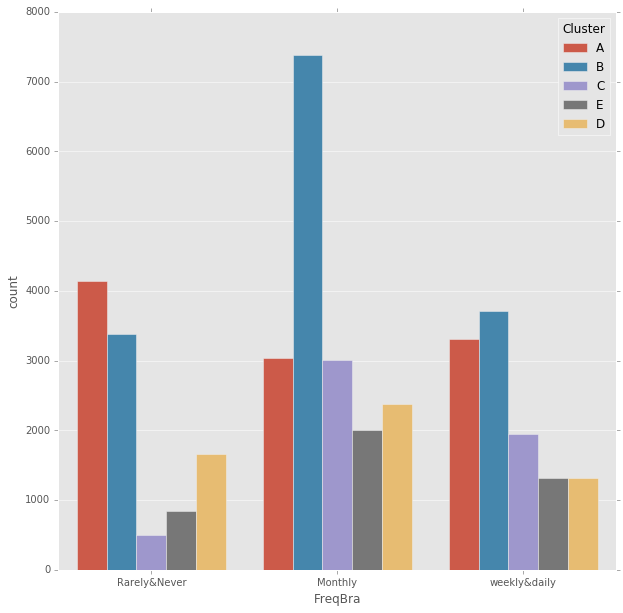

In [12]:
sns.countplot(x='FreqBra', data=df, hue='Cluster')

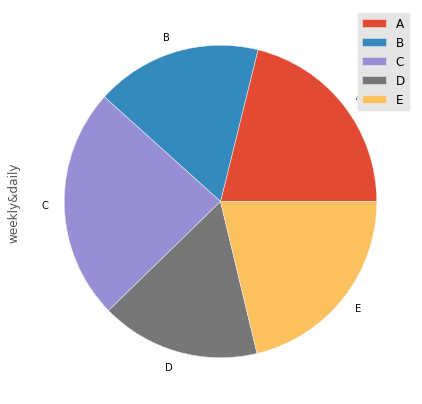

In [34]:
pd.crosstab(index=df['Cluster'], columns=df['FreqBra'], normalize='index').plot.pie(y='weekly&daily', figsize=(7, )


In [22]:
pd.crosstab(index=df['Cluster'], columns=df['FreqInt'], normalize='index')
# plt.title('Proportion of weekly&daily usage of Internet Banking')

FreqInt,Monthly,Rarely&Never,weekly&daily
Cluster,,,
A,0.080642,0.856480,0.062878
B,0.098788,0.808236,0.092977
C,0.103709,0.778388,0.117903
D,0.185063,0.181951,0.632986
E,0.181449,0.421468,0.397083


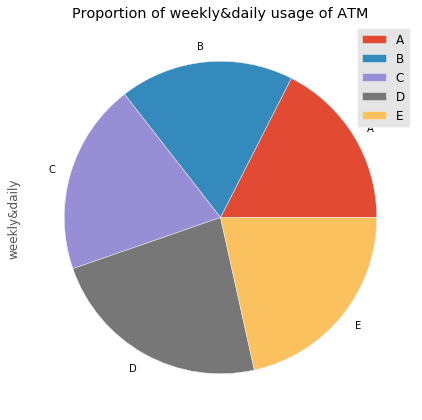

In [56]:
pd.crosstab(index=df['Cluster'], columns=df['FreqATM'], normalize='index').plot.pie(y='weekly&daily', figsize=(7, 7))
plt.title('Proportion of weekly&daily usage of ATM')

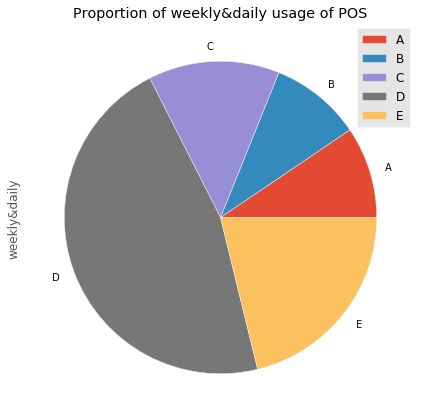

In [58]:
pd.crosstab(index=df['Cluster'], columns=df['FreqPOS'], normalize='index').plot.pie(y='weekly&daily', figsize=(7, 7))
plt.title('Proportion of weekly&daily usage of POS')

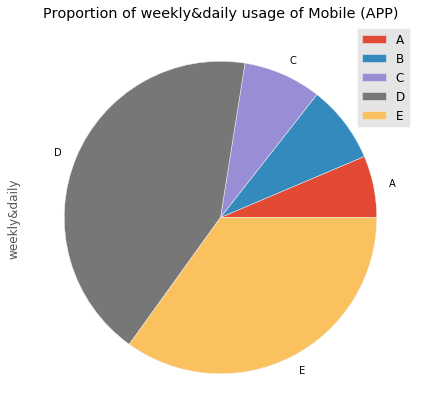

In [59]:
pd.crosstab(index=df['Cluster'], columns=df['FreqMob'], normalize='index').plot.pie(y='weekly&daily', figsize=(7, 7))
plt.title('Proportion of weekly&daily usage of Mobile (APP)')

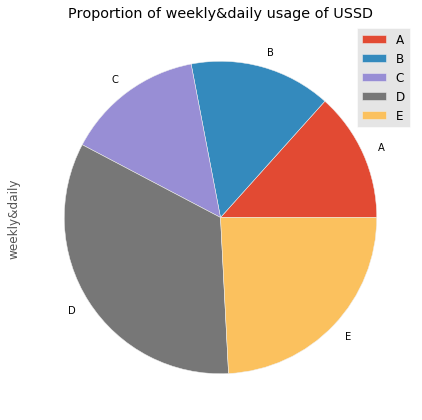

In [60]:
pd.crosstab(index=df['Cluster'], columns=df['FreqUSSD'], normalize='index').plot.pie(y='weekly&daily', figsize=(7, 7))
plt.title('Proportion of weekly&daily usage of USSD')

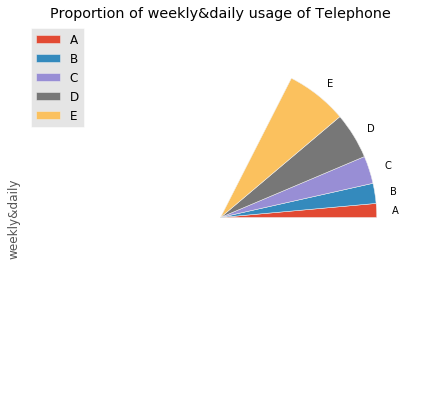

In [61]:
pd.crosstab(index=df['Cluster'], columns=df['FreqTel'], normalize='index').plot.pie(y='weekly&daily', figsize=(7, 7))
plt.title('Proportion of weekly&daily usage of Telephone')

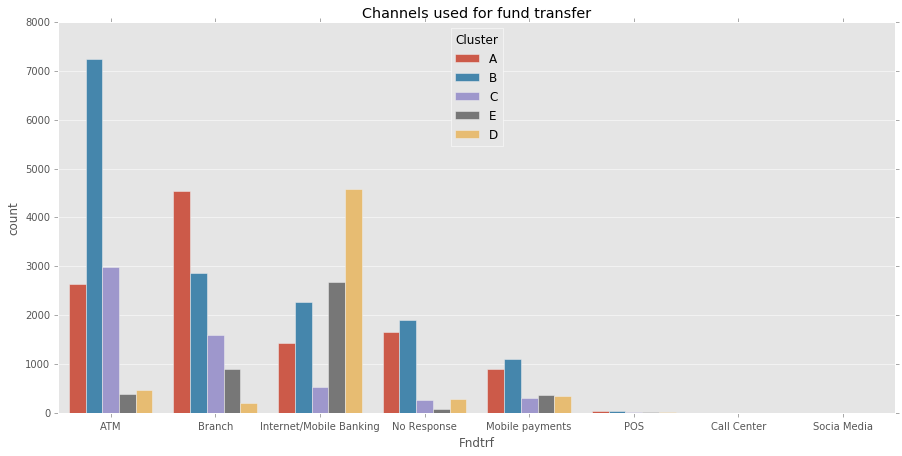

In [80]:
plt.rcParams['figure.figsize']=(15,7)
sns.countplot(x='Fndtrf', data=df, hue='Cluster')
plt.title('Channels used for fund transfer')

In [6]:
pd.crosstab(index=df['Cluster'], columns=df['Fndtrf'], normalize='index')

Fndtrf,ATM,Branch,Call Center,Internet/Mobile Banking,Mobile payments,No Response,POS,Socia Media
Cluster,,,,,,,,
A,0.235388,0.404936,0.000356,0.128029,0.080631,0.146739,0.003920,0.000000
B,0.470164,0.186222,0.000195,0.147263,0.071424,0.122784,0.001818,0.000130
C,0.524859,0.281911,0.000353,0.091678,0.053068,0.046897,0.001234,0.000000
D,0.080765,0.034372,0.000339,0.775652,0.057230,0.047748,0.003556,0.000339
E,0.087885,0.203866,0.000000,0.603057,0.083839,0.017982,0.002922,0.000450


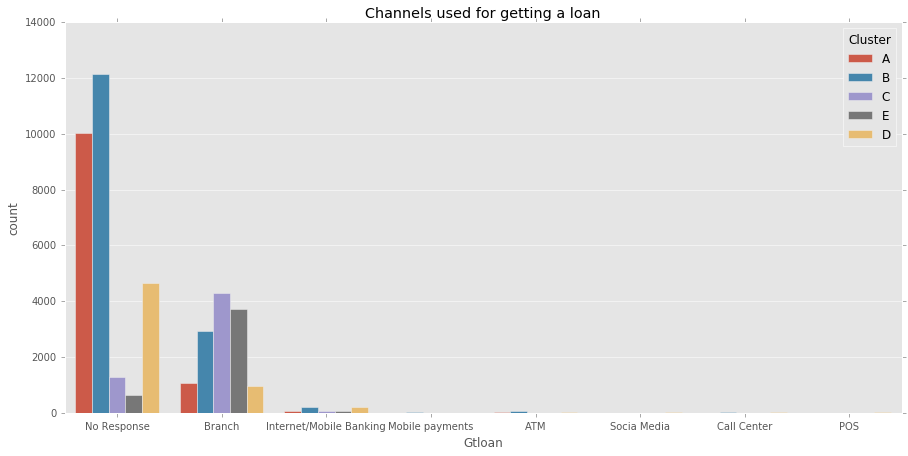

In [9]:
plt.rcParams['figure.figsize']=(15,7)
sns.countplot(x='Gtloan', data=df, hue='Cluster')
plt.title('Channels used for getting a loan')

In [10]:
pd.crosstab(index=df['Cluster'], columns=df['Gtloan'], normalize='index')

Gtloan,ATM,Branch,Call Center,Internet/Mobile Banking,Mobile payments,No Response,POS,Socia Media
Cluster,,,,,,,,
A,0.001426,0.095866,0.000000,0.007306,0.000891,0.893621,0.000891,0.000000
B,0.003766,0.191091,0.000844,0.013116,0.000779,0.789234,0.000649,0.000519
C,0.000882,0.757934,0.001058,0.012341,0.001058,0.226375,0.000353,0.000000
D,0.003556,0.161531,0.002032,0.037081,0.000508,0.790044,0.002878,0.002370
E,0.001124,0.838840,0.000450,0.016183,0.001573,0.140706,0.001124,0.000000


In [7]:
def turnToNo(col):
    if col == 'Yes':
        return 'Yes'
    else:
        return 'No'
    
cols_no = ['Payuticash','Payintcash','Paycabcash','Payuti','Payint','Paycab','Mig1','Mig2','Mig3']

for i in cols_no:
    df[i] = df[i].apply(turnToNo)


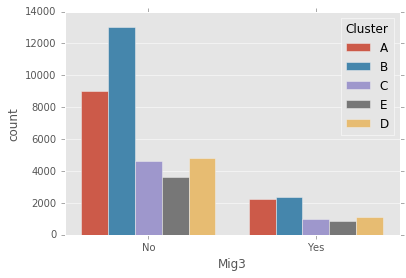

In [14]:
sns.countplot(x='Mig3', data=df, hue='Cluster')

In [32]:
# sns.countplot(x='Bank', data=df, hue='Cluster')
pd.crosstab(index=df['Cluster'], columns=df['Most frequently used Bank'], normalize='index')

Most frequently used Bank,Bank A,Bank B,Bank C,Bank D,Bank E,Bank F,Bank G,Bank H,Bank I,Bank J,Bank K,Bank L,Bank M,Bank N,Bank O,Bank P,Bank Q
Cluster,,,,,,,,,,,,,,,,,
A,0.101271,0.158358,0.190323,0.093646,0.020821,0.044966,0.047801,0.082991,0.029228,0.035973,0.022972,0.060411,0.010459,0.055816,0.016911,0.010753,0.017302
B,0.106917,0.169972,0.198479,0.105282,0.020758,0.039312,0.048767,0.085519,0.016990,0.035402,0.017061,0.055093,0.009170,0.050402,0.016990,0.007820,0.016066
C,0.112208,0.189292,0.136890,0.076324,0.017467,0.048794,0.041390,0.079742,0.029998,0.046136,0.024112,0.052402,0.016328,0.071578,0.023543,0.016138,0.017657
D,0.075145,0.148238,0.274100,0.097334,0.012866,0.026478,0.038971,0.110759,0.011934,0.034682,0.022003,0.036174,0.003729,0.080552,0.010069,0.010628,0.006340
E,0.074358,0.206522,0.189970,0.091897,0.015810,0.040514,0.032856,0.091156,0.026680,0.034832,0.020504,0.051630,0.009387,0.070899,0.015563,0.012352,0.015069
